<h2> Actividad regresión lineal con datos de salario

Fernando Cerriteño Magaña A01702790

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Se eliminan las variables que no se ocupan

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace = True)
df.drop('work_year',axis=1,inplace = True)
df.drop('job_title',axis=1,inplace = True)
df.drop('salary_currency',axis=1,inplace = True)
df.drop('employee_residence',axis=1,inplace = True)
df.drop('company_location',axis=1,inplace = True)
df.drop('company_size',axis=1,inplace = True)

In [ ]:
df.head()

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50


Se checa que no existan varibales nulas

In [ ]:
df.isnull().sum()

experience_level    0
employment_type     0
salary              0
salary_in_usd       0
remote_ratio        0
dtype: int64

Se genera nuevas columnas dummies para trabajar solo con enteros

In [ ]:
dummies_el = pd.get_dummies(df['experience_level'],prefix='Exp')
dummies_et = pd.get_dummies(df['employment_type'],prefix='Emp')

In [ ]:
df = pd.concat([df,dummies_et],axis=1)
df = pd.concat([df,dummies_el],axis=1)

Se eliminan experience level y employment type para tabajar con las creadas previamente

In [ ]:
df.drop('employment_type',axis=1,inplace = True)
df.drop('experience_level',axis=1,inplace = True)

In [ ]:
df.head()

,salary,salary_in_usd,remote_ratio,Emp_CT,Emp_FL,Emp_FT,Emp_PT,Exp_EN,Exp_EX,Exp_MI,Exp_SE
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,1,0,0,0,0,1
2,85000,109024,50,0,0,1,0,0,0,0,1
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,1,0,0,0,0,1


Se empieza a revisar que los datos sean independientes

In [ ]:
correlacion = df.corr()
correlacion

,salary,salary_in_usd,remote_ratio,Emp_CT,Emp_FL,Emp_FT,Emp_PT,Exp_EN,Exp_EX,Exp_MI,Exp_SE
salary,1.000000,-0.083906,-0.014608,-0.008268,-0.014568,0.025685,-0.020006,-0.015845,0.014130,0.074626,-0.065995
salary_in_usd,-0.083906,1.000000,0.132122,0.092907,-0.073863,0.091819,-0.144627,-0.294196,0.259866,-0.252024,0.343513
remote_ratio,-0.014608,0.132122,1.000000,0.065149,-0.016865,-0.023834,-0.002935,-0.010490,0.041208,-0.127850,0.113071
Emp_CT,-0.008268,0.092907,0.065149,1.000000,-0.007423,-0.506989,-0.011795,0.066013,0.070739,-0.028817,-0.047768
Emp_FL,-0.014568,-0.073863,-0.016865,-0.007423,1.000000,-0.453089,-0.010541,-0.033537,-0.017229,0.068108,-0.034520
Emp_FT,0.025685,0.091819,-0.023834,-0.506989,-0.453089,1.000000,-0.719987,-0.167828,-0.008698,-0.006597,0.128381
Emp_PT,-0.020006,-0.144627,-0.002935,-0.011795,-0.010541,-0.719987,1.000000,0.204028,-0.027379,-0.013805,-0.119762
Exp_EN,-0.015845,-0.294196,-0.010490,0.066013,-0.033537,-0.167828,0.204028,1.000000,-0.087108,-0.302761,-0.381033
Exp_EX,0.014130,0.259866,0.041208,0.070739,-0.017229,-0.008698,-0.027379,-0.087108,1.000000,-0.155539,-0.195751
Exp_MI,0.074626,-0.252024,-0.127850,-0.028817,0.068108,-0.006597,-0.013805,-0.302761,-0.155539,1.000000,-0.680373


In [ ]:
alta_corr = np.where((correlacion>0.95)&(correlacion<1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
baja_corr = np.where((correlacion<-0.95)&(correlacion>-1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Debido a que no se necesito estandarizar los datos, se continua con la regresión lineal

Se divide la base de datos para el modelo con una semilla predeterminada

In [ ]:
entrenamiento,prueba=train_test_split(df,test_size=0.20,random_state=42)

In [ ]:
entrenamiento

,salary,salary_in_usd,remote_ratio,Emp_CT,Emp_FL,Emp_FT,Emp_PT,Exp_EN,Exp_EX,Exp_MI,Exp_SE
9,125000,125000,50,0,0,1,0,0,0,0,1
227,75000,88654,50,0,0,1,0,0,0,1,0
591,144854,144854,100,0,0,1,0,0,0,0,1
516,152500,152500,100,0,0,1,0,0,0,0,1
132,38400,38400,100,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,37000,42197,50,0,0,1,0,0,0,1,0
106,235000,187442,100,0,0,1,0,0,0,1,0
270,72500,72500,100,0,0,1,0,1,0,0,0
435,70000,91614,100,0,0,1,0,0,0,1,0


In [ ]:
prueba

,salary,salary_in_usd,remote_ratio,Emp_CT,Emp_FL,Emp_FT,Emp_PT,Exp_EN,Exp_EX,Exp_MI,Exp_SE
563,140250,140250,100,0,0,1,0,0,0,0,1
289,135000,135000,100,0,0,1,0,0,0,0,1
76,100000,100000,100,0,0,1,0,0,0,1,0
78,270000,270000,100,1,0,0,0,0,0,1,0
182,22000,26005,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
249,170000,170000,100,0,0,1,0,0,0,0,1
365,138600,138600,100,0,0,1,0,0,0,0,1
453,120000,120000,100,0,0,1,0,0,0,1,0
548,99050,99050,100,0,0,1,0,0,0,0,1


Se empieza a trabajar en el modelo

In [ ]:
#salary_in_usd es la variable dependiente
#Se omite EMP_PT y EXP_SE debido a que quedan implicitas
modelo=smf.ols(formula='salary_in_usd~salary+Exp_EN+Exp_EX+Exp_MI',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.70
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.24e-29
Time:                        00:37:09   Log-Likelihood:                -6047.6
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     480   BIC:                         1.213e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.413e+05   4276.518     33.037      0.0

Analizando el resumen obtenido, se observa que:

r<sup>2</sup> = 0.253

En este caso la expresión es y = &beta;<sub>0</sub> + &beta;<sub>1</sub>X + ... + &beta;<sub>n</sub>X<sub>n</sub>

&beta;<sub>0</sub> siendo Intercept en la tabla mostrada previamente

<span>&#8756;</span>

Tomando en cuenta los p-values, la ecuación matemática que describe el modelo es:

<i>y = 1.413e+05 - 0.0068 * 'salary' - 7.754e+04 * 'Exp_EN' + 6.913e+04 * Exp_EX - 4.91e+04 * Exp_MI

In [ ]:
# y_aprox=9.787e+04-0.0067*prueba['salary']+7.688e+04*prueba['Emp_CT']-7.485e+04*prueba['Exp_EN']+6.662e+04*prueba['Exp_EX']-4.79e+04*prueba['Exp_MI']
y_aprox=1.413e+05-0.0068*prueba['salary']-7.754e+04*prueba['Exp_EN']+6.913e+04*prueba['Exp_EX']-4.91e+04*prueba['Exp_MI']

In [ ]:
tabla=pd.DataFrame({'Real':prueba['salary_in_usd'],'Prediccion':y_aprox,'Error':prueba['salary_in_usd']-y_aprox})
tabla

,Real,Prediccion,Error
563,140250,140346.30,-96.30
289,135000,140382.00,-5382.00
76,100000,91520.00,8480.00
78,270000,90364.00,179636.00
182,26005,92050.40,-66045.40
...,...,...,...
249,170000,140144.00,29856.00
365,138600,140357.52,-1757.52
453,120000,91384.00,28616.00
548,99050,140626.46,-41576.46


<h2>Gráfico de disperción

Text(0, 0.5, 'Prediccion')

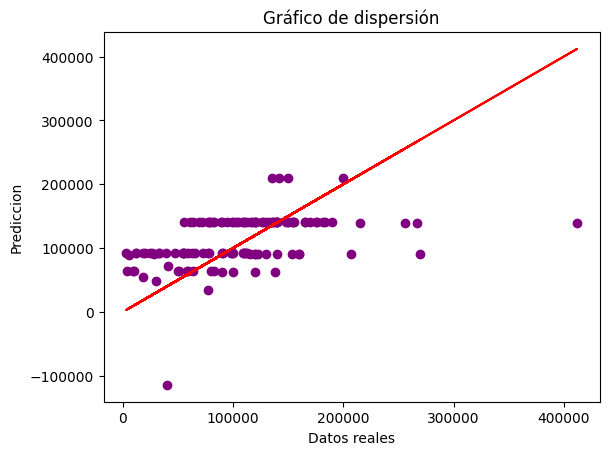

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'],y_aprox,color='purple')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'],color='red')
plt.title('Gráfico de dispersión')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

<h2>Gráfico de residuos

In [ ]:
l_residuos=len(tabla['Error'])

Text(0, 0.5, 'Valor del residuo')

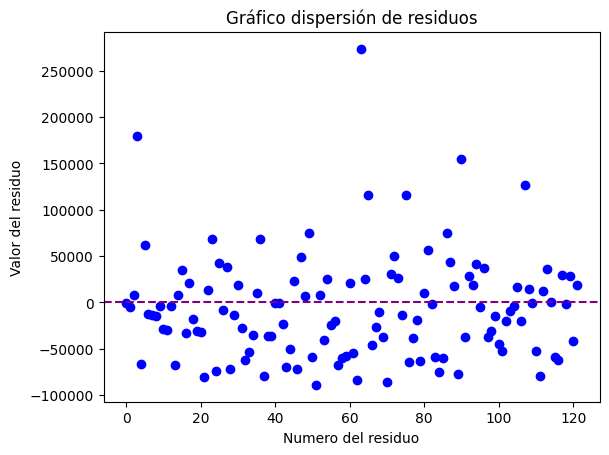

In [ ]:
plt.scatter(range(l_residuos),tabla['Error'],color='blue')
plt.axhline(y=0,linestyle='--',color='purple')
plt.title('Gráfico dispersión de residuos')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

<h2>Histograma

Text(0, 0.5, 'Frecuencia(probabilidad)')

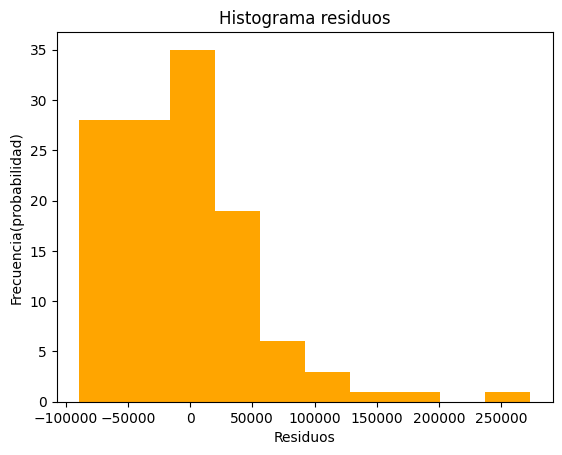

In [ ]:
plt.hist(x=tabla['Error'],color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia(probabilidad)')

In [ ]:
media=tabla['Error'].mean()
std=tabla['Error'].std()
Error_est=tabla['Error']-media/std

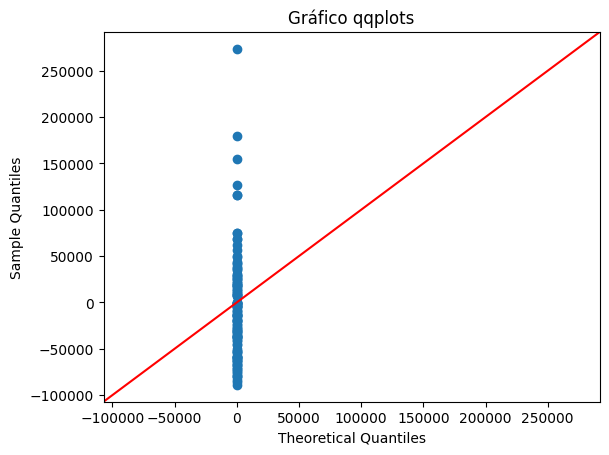

In [ ]:
stats.kstest(Error_est,'norm')

#qqplot
QQ=sm.qqplot(tabla['Error'],stats.norm,line='45')
plt.title('Gráfico qqplots')
plt.show()